<div style="text-align: center;font-weight: bold; font-size:26px">Airbnb Rental Market Analysis</div>

<div style="text-align: left; font-size:16px">This notebook aims to analyze New York City Airbnb Data to uncover trends, patterns, and factors influencing the rental market.</div>

Key Questions:
- What are the average rental prices in different neighborhoods?
- How do prices correlate with the number of reviews, room types, or host verification status?
- What are the factors that most influence price variations?


Data Took from: [Kaggle](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data)

<div style="text-align: center;font-weight: bold; font-size:20px">1. Overview</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('airbnb_open_data.csv')

df.head()

df.info()

df.isnull().sum()

df.describe()

<div style="text-align: left; font-size:14px"> Here we can see that this dataset has quite a <b>large number</b> of records and therefore suitable for analysis</div>
</br>

<div style="max-width:400px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">
    
![alt text](image-1.png)
    
</div>


<div style="text-align: center;font-weight: bold; font-size:20px">
2. Data Cleaning
</div>

In [ ]:
#Dropping rows where critical information like price or number of reviews is missing
df_cleaned = df.dropna(subset=['price', 'number of reviews'])

#Filling missing values in reviews per month by giving them value 0
df_cleaned['reviews per month'].fillna(0, inplace=True)

#Checking missing values after the cleaning
df_cleaned.isnull().sum()

#Deleting collumn with missing values
df_cleaned = df_cleaned.drop(columns=['license'])

#Checking
df_cleaned.head()

#Converting price from string to numeric
df_cleaned['price'] = df_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

#Converting service fee from string to numeric
df_cleaned['service fee'] = df_cleaned['service fee'].replace('[\$,]', '', regex=True).astype(float)

#Converting last review to date format
df_cleaned['last review'] = pd.to_datetime(df_cleaned['last review'])
df_cleaned['last review'] = df_cleaned['last review'].dt.normalize()

#Checking data types
df_cleaned.dtypes

#Checkong rows before removing outliers
print(f'Number of rows before percentile filtering: {df_cleaned.shape[0]}')

#Choosing borders
lower_bound = df_cleaned['price'].quantile(0.01)
upper_bound = df_cleaned['price'].quantile(0.99)

#Creating mask
outliers_mask = (df_cleaned['price'] < lower_bound) | (df_cleaned['price'] > upper_bound)

#Filtering regrading mask
df_cleaned_no_outliers = df_cleaned[~outliers_mask]

#Checking rows after removing outliers
print(f'Number of rows after percentile filtering: {df_cleaned_no_outliers.shape[0]}')

df_cleaned = df_cleaned_no_outliers

df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].replace('manhatan', 'Manhattan')
df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].replace('brookln', 'Brooklyn')


<div style="text-align: left; font-size:14px">Here we using quantile method to <b>removing outliers</b>. Percentiles allows to remove the smallest and largest 1% of the data, which is not used when working with real market data</div>

</br>

<div style="max-width:400px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-2.png)

</div>

<div style="text-align: left; font-size:14px">We can see, that this dataset has 1966 outliers which were removed</div>

</br>

<div style="max-width:400px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-3.png)

</div>

<div style="text-align: center;font-weight: bold; font-size:20px">3. Exploratory Data Analysis</div>

In [ ]:
#Histogram for price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['price'], bins=30, color='blue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

<div style="text-align: left; font-size:14px">We don't observe a clear pattern in the price distribution, and it appears to be spread relatively evenly</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-9.png)

</div>

In [ ]:
#Price distribution by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df_cleaned)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

<div style="text-align: left; font-size:14px">Regarding the price distribution by room type, we can observe that hotel rooms tend to be the most expensive, typically starting at around $500. This reflects their more premium offerings compared to other room types. On the other hand, shared rooms are the cheapest option, but they also exhibit the widest price range. The significant variability in shared room pricing could indicate that while they are generally budget-friendly, some listings may offer unique features or locations that drive prices higher</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-10.png)

</div>

In [ ]:
#Scatter plot for price vs number of reviews
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['number of reviews'], df_cleaned['price'], alpha=0.5, color='purple')
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (USD)')
plt.show()

<div style="text-align: left; font-size:14px">We don't observe a clear relationship between the number of reviews and price. Listings with a higher number of reviews do not necessarily have higher or lower prices. This suggests that the number of reviews may not be a strong indicator of price, as one might expect
</br></br>
Several factors could explain this lack of correlation. For example, objects with lower prices could receive more bookings and, therefore, accumulate more reviews over time, while higher-priced properties might cater to a niche market with fewer guests but longer stays</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-11.png)

</div>

In [ ]:
#Grouping by neighbourhood group to count the number of rows
neighborhood_counts = df_cleaned['neighbourhood group'].value_counts()

#Bar plot
plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar', color='teal')
plt.title('Number of Records by Neighborhood Group')
plt.ylabel('Number of Records')
plt.xlabel('Neighborhood Group')
plt.show()

<div style="text-align: left; font-size:14px">Before we starting analyzing neighborhood groups we should see how many records we have for each of them</br>
High number for Manhattan and Brooklyn may indicate popularity of this neighborhoods in rent market</div></br>


<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">


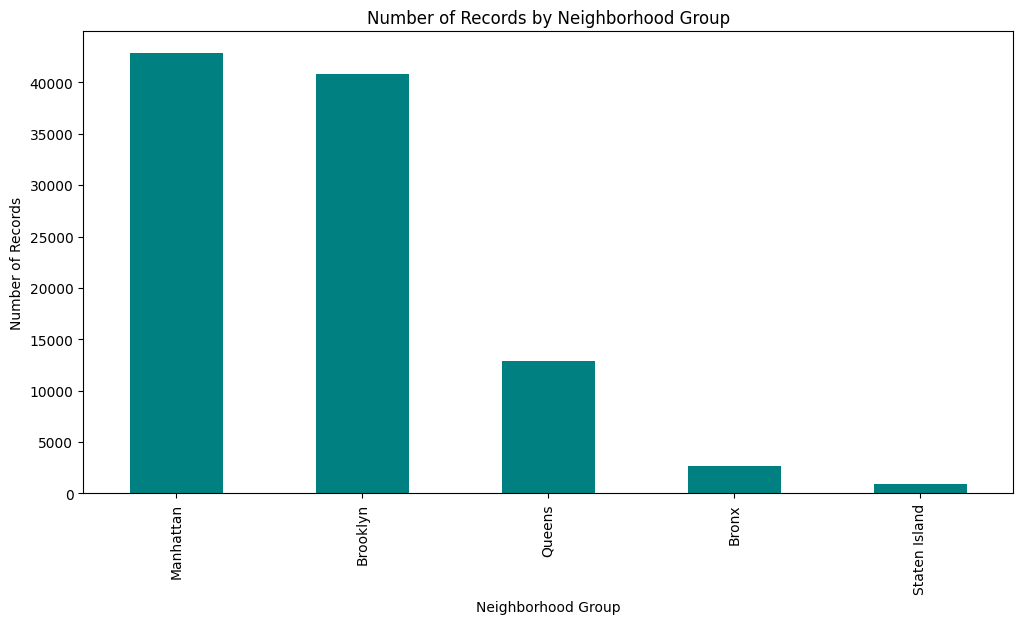

</div>


In [ ]:
#Grouping by neighborhoods to find the average price
neighborhood_prices = df_cleaned.groupby('neighbourhood group')['price'].mean().sort_values()

#Bar plot of average price by neighborhood
plt.figure(figsize=(12, 6))
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Price by Neighborhood')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighborhood Group')
plt.show()

<div style="text-align: left; font-size:14px"> We can see that the average price is relatively similar across groups. This suggests that looking at neighbourhood group alone may not provide meaningful insights into price variations. To gain a more detailed understanding, it's essential to analyze prices at a more granular level by examining individual neighbourhoods within each neighbourhood group </div>

</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-18.png)

</div>

In [ ]:
#Filtering only Bronx
df_bronx = df_cleaned[df_cleaned['neighbourhood group'] == 'Bronx']

#Grouping for getting mean price
neighborhood_prices = df_bronx.groupby('neighbourhood')['price'].mean().sort_values()

#Creating bar plot
plt.figure(figsize=(12, 6))
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Price by Neighborhood in Bronx')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighborhood')
plt.show()

<div style="text-align: left; font-size:14px">When focusing on the Bronx, we can observe that prices range from as low as $300 and go up to $780. This range indicates a huge variation in pricing within the Bronx and shows us potencial most profitable neighbourhoods</div></br>


<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-20.png)

</div>

In [ ]:
#Filtering only Queens
df_queens = df_cleaned[df_cleaned['neighbourhood group'] == 'Queens']

#Grouping for getting mean price
neighborhood_prices = df_queens.groupby('neighbourhood')['price'].mean().sort_values()

#Creating bar plot
plt.figure(figsize=(12, 6))
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Price by Neighborhood in Queens')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighborhood')
plt.show()

<div style="text-align: left; font-size:14px">In Queens, we can see that prices range from $300 to $800, with the average price settling around $600. So, investors targeting this mid-range pricing could benefit from a balanced demand for both affordability and comfort</div></br>


<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-21.png)


</div>

In [ ]:
#Filtering only Brooklyn
df_brooklyn = df_cleaned[df_cleaned['neighbourhood group'] == 'Brooklyn']

#Grouping for getting mean price
neighborhood_prices = df_brooklyn.groupby('neighbourhood')['price'].mean().sort_values()

#Creating bar plot
plt.figure(figsize=(12, 6))
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Price by Neighborhood in Brooklyn')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighborhood')
plt.show()

<div style="text-align: left; font-size:14px">Here we observe that prices range from $490 to $800. This narrower price range suggests that Brooklyn, compared to other areas, has a higher minimum entry point, with even the lower-priced listings starting close to $500. The upper end of the price range, reaching $800, indicates that Brooklyn has a relatively high prices
</br></br>
So, the higher starting price indicates a solid demand for rentals, which can be advantageous for those looking to generate consistent income from higher-paying renters. The fact that prices generally don't dip below $490 suggests that even more common objects in Brooklyn maintain a high level income over other neighbourhood groups.
So, stable price range from $490 to $800 means there is less risk of extreme price fluctuations, making Brooklyn a potentially reliable area for long-term rental income </div></br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-22.png)

</div>

In [ ]:
#Filtering only Staten Island
df_staten = df_cleaned[df_cleaned['neighbourhood group'] == 'Staten Island']

#Grouping for getting mean price
neighborhood_prices = df_staten.groupby('neighbourhood')['price'].mean().sort_values()

#Creating bar plot
plt.figure(figsize=(12, 6))
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Price by Neighborhood in Staten Island')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighborhood')
plt.show()

<div style="text-align: left; font-size:14px"> When analyzing Staten Island, we see that prices range from $300 to $1050, indicating a significant spread in rental prices. This wide range suggests that Staten Island offers a diverse set of rental options, from more affordable listings to premium, high-end properties </div></br>


<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-23.png)


</div>

In [ ]:
#Filtering only Manhattan
df_manhattan = df_cleaned[df_cleaned['neighbourhood group'] == 'Manhattan']

#Grouping for getting mean price
neighborhood_prices = df_manhattan.groupby('neighbourhood')['price'].mean().sort_values()

#Creating bar plot
plt.figure(figsize=(12, 6))
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Price by Manhattan')
plt.ylabel('Average Price (USD)')
plt.xlabel('Neighborhood')
plt.show()

<div style="text-align: left; font-size:14px">In Manhattan, we can observe that prices range from $500 to $700, indicating a relatively narrow spread in rental prices. This suggests that the rental market in Manhattan is more uniform compared to other areas, with less variation in price points across listings
</br></br>
For an investor looking to purchase property in Manhattan with the intent to rent, this narrow price range provides certain advantages. The consistent pricing suggests a stable market where rental rates are less prone to significant fluctuations. Properties starting at $500 offer a high baseline, which could yield a reliable and steady rental income. Additionally, since the upper limit of $700 isn't significantly higher than the lower end, investors may find it easier to predict returns and manage expectations regarding potential rental income
</br></br>
But, the narrow spread also implies that competition among similar properties could be stronger, as many objects will fall within the same price bracket. Therefore, investors might need to focus on advertising their property through added amenities, location advantages, or unique features to attract renters. While the range isn't as wide as in other neighbourhood groups, Manhattan's prime location and desirability ensure a strong demand for rentals, making it an appealing choice for those seeking a stable and lucrative investment</div></br>


<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-24.png)

</div>

In [ ]:
#Analyzing if instant bookable listings have an impact on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='instant_bookable', y='price', data=df_cleaned)
plt.title('Price Comparison: Instant Bookable vs Non-Instant Bookable')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.show()

<div style="text-align: left; font-size:14px">We can observe that there is practically no significant difference in price between instant bookable and non-instant bookable objects. This indicates that the ability to instantly book a property, without needing host approval, does not necessarily correlate with higher or lower rental prices </br>

One possible reason for this lack of differentiation could be that the instant booking feature is primarily a convenience for the guest, rather than a premium service that justifies a higher price. Property owners may enable this feature to attract more guests and increase booking frequency, but it doesn't seem to affect the perceived value of the listing in terms of pricing</div>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-13.png)

</div>

In [ ]:
#Average number of reviews by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='number of reviews', data=df_cleaned)
plt.title('Distribution of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()

<div style="text-align: left; font-size:14px">Here we can see that hotel rooms receive the highest number of reviews, while shared rooms have the fewest. This trend suggests that hotel rooms, which often offer more standardized services and amenities, attract a larger number of guests, leading to more reviews. The higher number of reviews for hotel rooms might also reflect the higher turnover and shorter stays typically associated with this type of accommodation</br>

For potential investors, this information highlights how room type can impact guest engagement and the overall visibility of a property on platforms like Airbnb. Listings with more reviews often appear more trustworthy and appealing to future guests, making it crucial to consider room type when setting rental strategies</div></br>



<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-14.png)


</div>

In [ ]:
#Availability distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['availability 365'], bins=30, kde=True, color='green')
plt.title('Distribution of Property Availability (365 Days)')
plt.xlabel('Availability (days per year)')
plt.ylabel('Count')
plt.show()


df_cleaned['availability_range'] = pd.cut(df_cleaned['availability 365'], bins=[0, 100, 200, 300, 365], 
                                          labels=['0-100', '101-200', '201-300', '301-365'])

#Price by availability range
plt.figure(figsize=(10, 6))
sns.boxplot(x='availability_range', y='price', data=df_cleaned, palette='Set2')
plt.title('Price Distribution by Availability Range')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price (USD)')
plt.show()

<div style="text-align: left; font-size:14px">Analyzing the distribution of property availability, we can observe that a significant number of listings do not provide this value or leave it as a default. This suggests that many hosts either do not update the availability field regularly </br>

Moreover, from the analysis, we can conclude that property availability does not have a noticeable impact on price. Listings with different availability levels—whether fully available throughout the year or even blank do not show significant price differences</br>

</div>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-15.png)

</div>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-25.png)

</div>

In [ ]:
#Scatter plot of price vs. minimum nights
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['minimum nights'], df_cleaned['price'], alpha=0.5, color='blue')
plt.title('Price vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price (USD)')
plt.show()

<div style="text-align: left; font-size:14px">Here we also can see the same situation as in previous one. We can't catch any clear relationship between these two variables. This lack of a clear connection could be explained by the fact that minimum night requirements are likely set based on host preferences</br>

For investors, this means that setting a minimum number of nights for a booking may not influence the price but could impact booking frequency. Longer minimum stays might reduce guest turnover and simplify management, while shorter minimum stays could attract more guests but potentially increase the effort required to manage the property</div>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-16.png)

</div>

In [ ]:
#Bar plot of room type vs. instant bookable status
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', hue='instant_bookable', data=df_cleaned, palette='Set1')
plt.title('Room Type vs Instant Bookable Status')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


<div style="text-align: left; font-size:14px">Here we observe that the "True" status (where objects are instant bookable) only slightly outweighs the "False" status in the shared room category. This indicates that hosts offering shared rooms are marginally more likely to enable instant booking compared to other room types, but the difference is not very pronounced. One possible explanation for this trend is that shared rooms typically attract budget-conscious or short-term travelers who value convenience and speed in the booking process</br>

For property investors, this insight suggests that enabling instant booking in shared rooms might attract more guests who prioritize quick and hassle-free bookings. However, since the difference is minimal, it shows that most room types are relatively balanced in terms of whether instant booking is enabled or not. This means that enabling instant booking may offer a slight competitive edge, but it's not the dominant factor in any specific room type category</div>


<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-17.png)

</div>

In [ ]:
#Average reviews per month by neighborhood group
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='reviews per month', data=df_cleaned, estimator=np.mean, palette='coolwarm')
plt.title('Average Reviews per Month by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Reviews per Month')
plt.show()

<div style="text-align: left; font-size:14px">Analyzing the average reviews per month by neighborhood group, we observe that Queens, Staten Island, and the Bronx show the highest average number of reviews per month. But, we think that it is because these neighborhood groups also have the smallest amount of data in the dataset that's why it skew the results</div></br>


<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

![alt text](image-19.png)

</div>

<div style="text-align: center;font-weight: bold; font-size:20px"> 4. Correlation Analysis </div>

In [ ]:
#Choosing only numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

#Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

#Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Airbnb Listings')
plt.show()

We can observe a perfect correlation (1.0) between price and service fee, which suggests that these two variables are directly related. This could imply that as the price of a listing increases, the service fee tends to increase proportionally, likely because the service fee is calculated as a percentage of the price.

Additionally, there is a strong positive correlation (0.62) between number of reviews and reviews per month. This is logical, as listings with a higher total number of reviews are more likely to receive frequent reviews on a monthly basis. The correlation indicates that these two variables are closely related, with more active listings naturally accumulating both a higher count of reviews and more frequent feedback over time.

<div style="max-width:1400px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

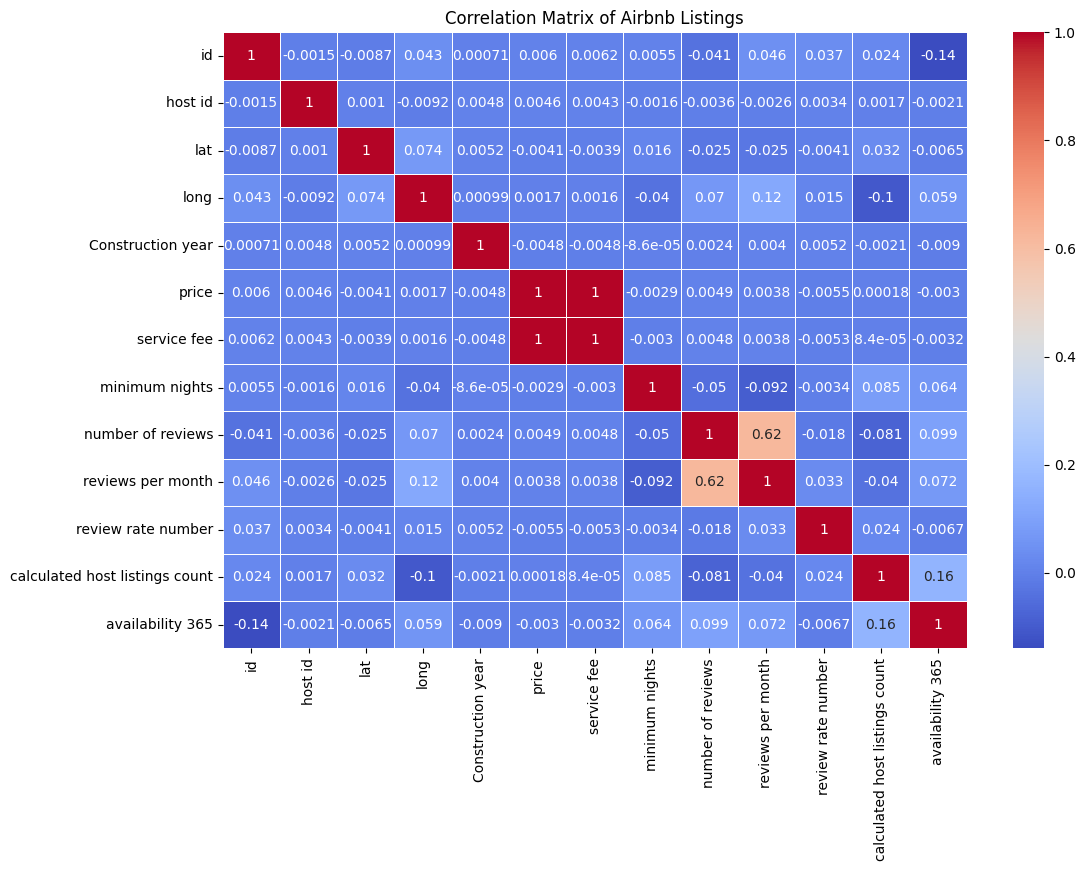

</div>

<div style="text-align: center;font-weight: bold; font-size:20px">5. Results</div></br>

<div style="text-align: left; font-size:14px">
Based on the analysis, we found that certain variables like location and room type have a strong influence on rental prices, other factors like instant bookable status or minimum night requirements do not significantly impact the price. The insights from the data can guide investors in making informed decisions about where and how to invest in rental properties </br>

<b>Key Questions Answers:</b>
1. What are the average rental prices in different neighborhoods?

The average rental prices vary across neighborhoods:
- Manhattan: Prices range from $500 to $700, indicating a narrow spread and a stable market. It is a lucrative but competitive investment area
- Brooklyn: Prices range from $300 to $1050, with a higher minimum entry point and a more diverse price range. The consistent demand in Brooklyn makes it a reliable area for long-term income
- Queens: Prices range from $300 to $800, with an average price around $600. This mid-range market offers a balance between affordability and comfort
- Bronx: Prices range from $300 to $780, providing opportunities for investors to target both affordable and higher-end rentals

2. How do prices correlate with the number of reviews, room types, or host verification status?
- Number of reviews: There is no clear relationship between the number of reviews and price. Properties with more reviews do not necessarily charge higher prices, indicating that review count is not a significant factor in pricing
- Room type: Hotel rooms tend to be the most expensive, while shared rooms are the cheapest. This is a key factor influencing pricing, as room type correlates directly with the level of privacy and amenities offered
- Host verification: There is no significant price difference between verified and unverified hosts, suggesting that host verification is not a primary driver of price

3. What are the factors that most influence price variations? 

The primary factors influencing price variations are:
- Room type: Entire homes and hotel rooms tend to have higher prices due to the privacy and space they offer. Shared rooms are generally more affordable
- Location: Neighborhoods such as Manhattan and Brooklyn maintain high prices due to their central locations and demand. The more affordable neighborhoods like Bronx and Staten Island offer a wider price range, catering to different segments of the market


<b>General Insights for Investors:</b> </br>
Brooklyn stands out as a promising area for stable rental income, with a relatively high minimum price and consistent demand. Investors can expect less price fluctuation here, making it ideal for long-term investment
Manhattan offers a narrow price range, which suggests stability but also higher competition. Investors will need to focus on property differentiation through amenities and location to stand out
Queens and Bronx provide opportunities in both the mid-range and lower-end markets. While prices are more affordable, the diverse price range allows for targeting different types of renters, offering flexibility in rental strategy
Instant Bookable Listings do not significantly impact price, meaning that investors can enable this feature to increase convenience for guests without expecting a substantial effect on income
Availability and Minimum Nights also do not strongly affect price, but optimizing these features can help attract more consistent bookings and increase occupancy rates, indirectly improving profitability
Overall, focusing on high-demand neighborhoods, ensuring the right room type, and considering competitive amenities will give investors a strong foundation for success in the rental market

</div>
